In [59]:
import requests
import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [60]:
# API link
api_prefix = "https://api.punkapi.com/v2/"

# Get data on all beers
resp = requests.get(api_prefix + "beers")

# Convert to json
beer = resp.json()

In [65]:
# Create network graph
g=nx.Graph()

# Create a dataframe
df = pd.DataFrame(beer)

#new_df=df[['name','abv', 'ibu']]
#df.head()

df['abv_to_ibu'] = df['abv'] / df['ibu']

df[['name','abv', 'ibu', 'abv_to_ibu']]

,name,abv,ibu,abv_to_ibu
0,Buzz,4.50,60.0,0.075000
1,Trashy Blonde,4.10,41.5,0.098795
2,Berliner Weisse With Yuzu - B-Sides,4.20,8.0,0.525000
3,Pilsen Lager,6.30,55.0,0.114545
4,Avery Brown Dredge,7.20,59.0,0.122034
5,Electric India,5.20,38.0,0.136842
6,AB:12,11.20,35.0,0.320000
7,Fake Lager,4.70,40.0,0.117500
8,AB:07,12.50,30.0,0.416667
9,Bramling X,7.50,75.0,0.100000


In [55]:
big_3 = {}
beer_names = df['name']

for index, row in df.iterrows():
    beer = row['name']
    abv_to_ibu_value = row['abv_to_ibu']

    if abv_to_ibu_value > 0.10:
        x = round(abv_to_ibu_value, 2)
        print(f"{beer}'s abv_to_ibu is {x}")
        big_3[beer] = x
        
        for other_beer in beer_names:
            if beer != other_beer:
                other_abv_to_ibu = df[df['name'] == other_beer]['abv_to_ibu'].values[0]
                if other_abv_to_ibu > 0.10:
                    g.add_edge(beer, other_beer)

Berliner Weisse With Yuzu - B-Sides's abv_to_ibu is 0.53
Pilsen Lager's abv_to_ibu is 0.11
Avery Brown Dredge's abv_to_ibu is 0.12
Electric India's abv_to_ibu is 0.14
AB:12's abv_to_ibu is 0.32
Fake Lager's abv_to_ibu is 0.12
AB:07's abv_to_ibu is 0.42
Misspent Youth's abv_to_ibu is 0.24
Alpha Dog's abv_to_ibu is 0.11
Mixtape 8's abv_to_ibu is 0.29
Libertine Porter's abv_to_ibu is 0.14
Hello My Name Is Mette-Marit's abv_to_ibu is 0.12
Rabiator's abv_to_ibu is 0.39
Vice Bier's abv_to_ibu is 0.17
Devine Rebel (w/ Mikkeller)'s abv_to_ibu is 0.12
Storm's abv_to_ibu is 0.13
Bad Pixie's abv_to_ibu is 0.1


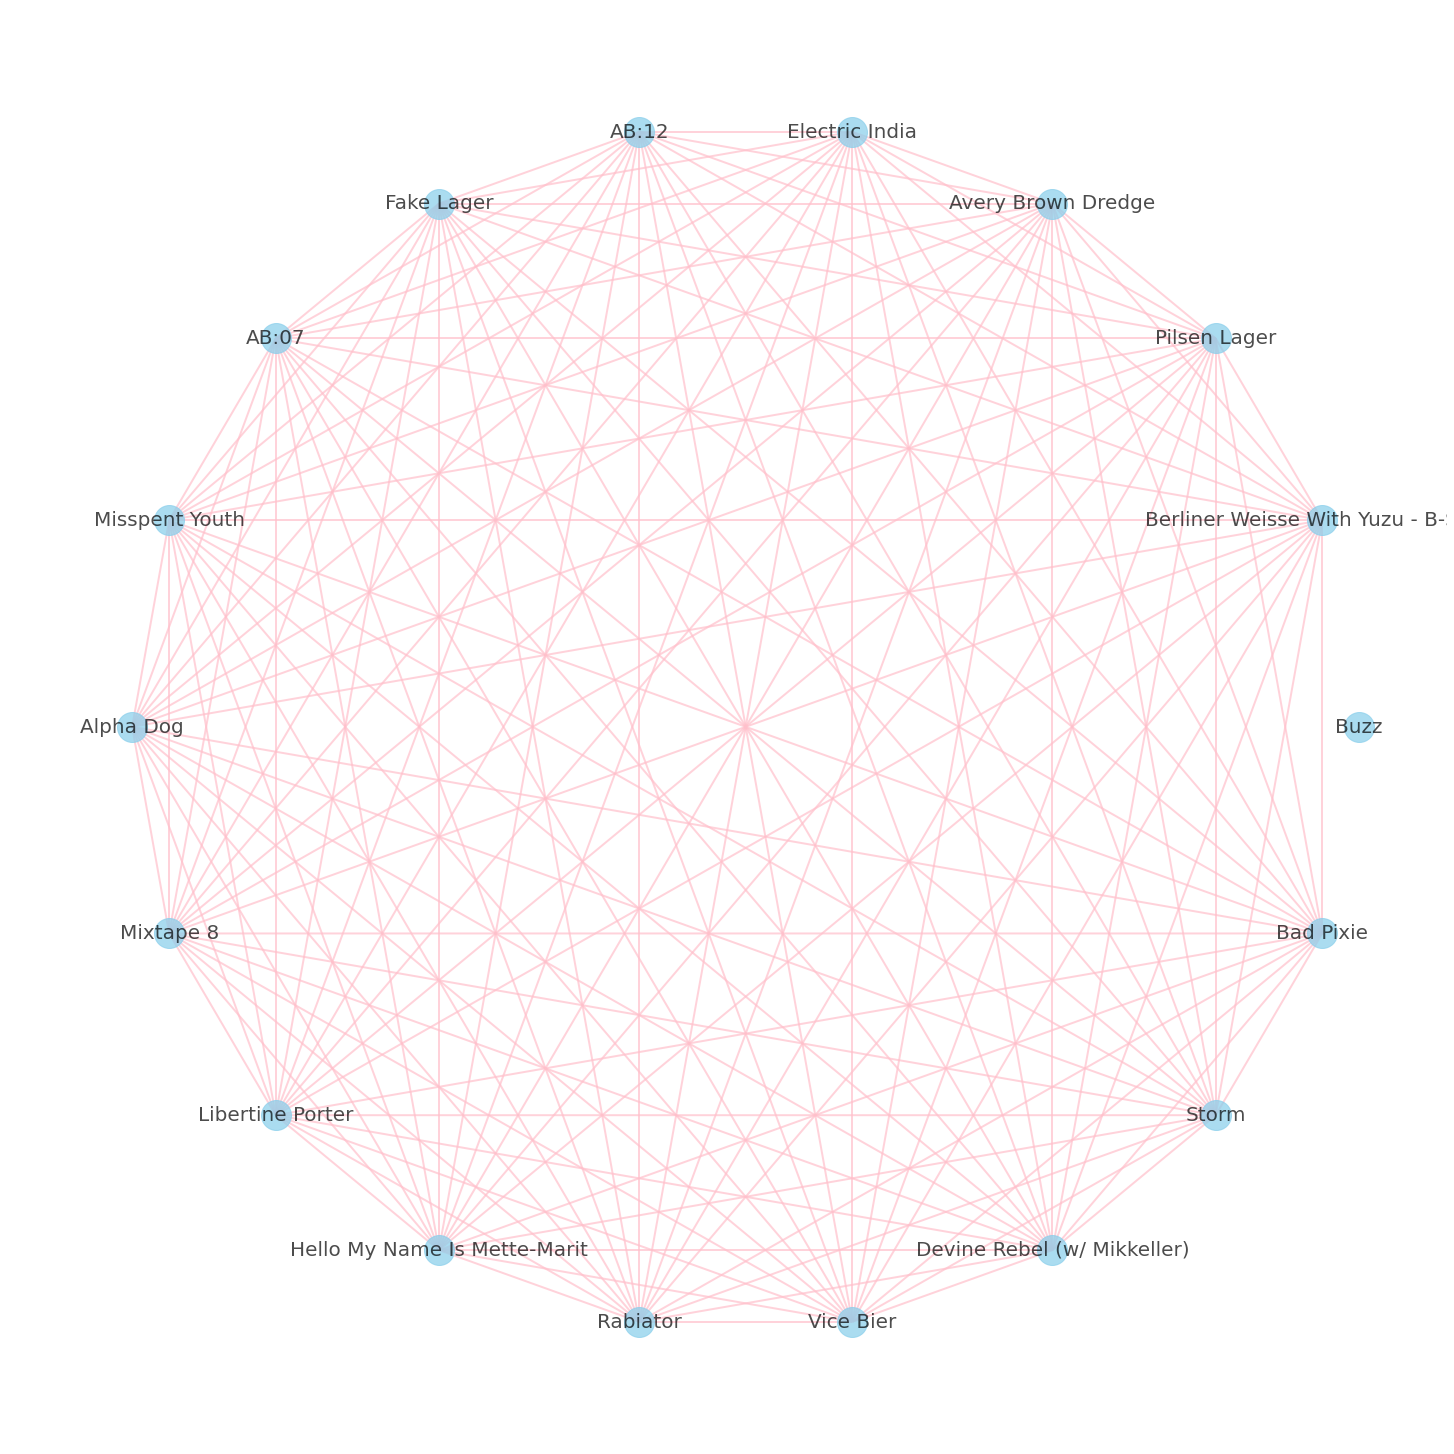

In [56]:
pos = nx.circular_layout(g)

plt.figure(figsize=(20, 20))
# Draw the graph with nodes and edges
nx.draw(g, pos, with_labels=True, node_color='skyblue', node_size=900, font_size=20,
        width=2,  # Increase edge width
        edge_color='pink',  # Change edge color
        alpha=0.7,  # Reduce edge transparency
        style='solid'  
        )

plt.show()

In [57]:
sorted_dict = dict(sorted(big_3.items(), key=lambda item: item[1], reverse=True))

# Slice the top 3 items
top_3_items = dict(list(sorted_dict.items())[:3])

print(top_3_items)

{'Berliner Weisse With Yuzu - B-Sides': 0.53, 'AB:07': 0.42, 'Rabiator': 0.39}
